In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd gdrive/My Drive/

/content/gdrive/My Drive


In [3]:
%pwd
%mkdir proyecto

mkdir: cannot create directory ‘proyecto’: File exists


In [4]:

%cd ./proyecto/

/content/gdrive/My Drive/proyecto


In [5]:
%pwd

'/content/gdrive/My Drive/proyecto'

In [6]:
!pip install pyts

     |████████████████████████████████| 2.5MB 14.5MB/s 


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis
import scipy.io as sc
from scipy.signal import freqz


In [8]:
%pwd


'/content/gdrive/My Drive/proyecto'

In [9]:
%ls

proyecto/  sisLoc.mat  sisReg.mat  sisTele.mat


In [22]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_lowpass(cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)    
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y
def butter_lowpass_bode (b ,a):
    angularFreq, freqResponse, phaseResponse = scipy.signal.bode(scipy.signal.lti(b, a))

    return angularFreq, freqResponse, phaseResponse

def butter_bandpass_bode (b ,a):
    angularFreq, freqResponse, phaseResponse = scipy.signal.bode(scipy.signal.lti(b, a))

    return angularFreq, freqResponse, phaseResponse


muestreo 100


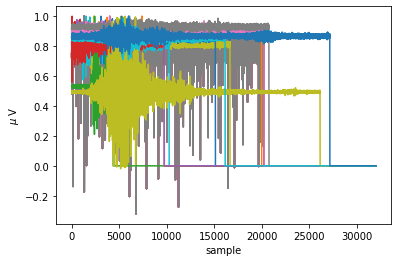

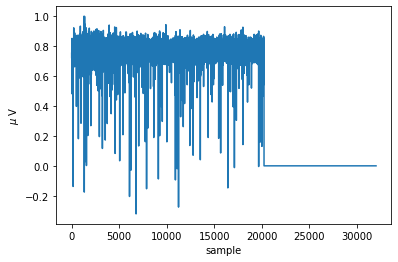

In [11]:
#Tele
data_tele = sc.loadmat('/content/gdrive/My Drive/proyecto/sisTele.mat')
data_tele.keys() # variables del diccionario

Y_tele = data_tele['Y']
fs_tele = data_tele['fs']
fs_tele = fs_tele[0][0]
print("muestreo",fs_tele)


plt.plot(Y_tele.T) #se le hace transpuesta
plt.xlabel('sample')
plt.ylabel('$\mu$ V')
plt.show()
sampleSignal = Y_tele[3,:] # se extrae una señal de la base de datos
plt.figure
plt.plot(sampleSignal)
yy = sampleSignal
plt.xlabel('sample')
plt.ylabel('$\mu$ V')
plt.show()


#regional 

data_reg = sc.loadmat('/content/gdrive/My Drive/proyecto/sisReg.mat')
data_reg.keys() # variables del diccionario

Y_reg = data_reg['Y']
fs_reg = data_reg['fs']

#Local


data_loc = sc.loadmat('/content/gdrive/My Drive/proyecto/sisLoc.mat')
data_loc.keys() # variables del diccionario

Y_loc = data_loc['Y']
fs_loc = data_loc['fs']

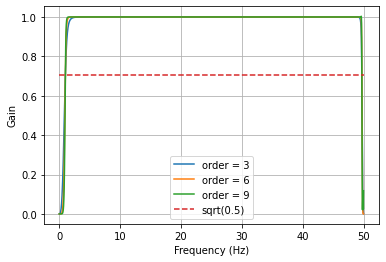

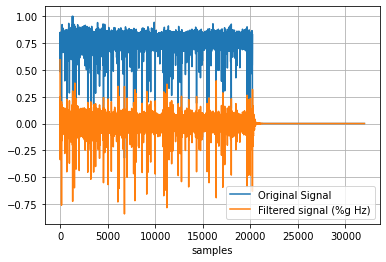

In [21]:
fs = fs_tele
lowcut = 1
highcut = 49.7

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3, 6, 9]:
  b, a = butter_bandpass(lowcut, highcut, fs, order)
  w, h = freqz(b, a, worN=2000)
  plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

plt.figure(2)
plt.clf()
plt.plot(yy, label='Original Signal')


y = butter_bandpass_filter(yy, lowcut, highcut, fs, order)
plt.plot(y, label='Filtered signal (%g Hz)' )
plt.xlabel('samples')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='lower right')

plt.show()

Aqui hare el filtro a las señales del tele sismo

0
[ 0.54898839  0.42100792  0.23163976  0.12390176 -0.09243569 -0.14246671
 -0.20516619 -0.20152467 -0.32619781 -0.29052515]
1
[ 0.6896137   0.48753347  0.20044406  0.09544908 -0.09292881 -0.11822005
 -0.24009136 -0.25216366 -0.3728473  -0.29901891]
2
[ 0.4445072   0.26696361  0.11778015  0.09524689 -0.10334478 -0.05238021
 -0.16118869 -0.18653603 -0.14735658 -0.20111966]
3
[ 0.4445072   0.26696361  0.11778015  0.09524689 -0.10334478 -0.05238021
 -0.16118869 -0.18653603 -0.14735658 -0.20111966]
4
[ 0.6761039   0.48774094  0.21293634  0.09983486 -0.09308916 -0.13473157
 -0.2451934  -0.25516146 -0.32428451 -0.32108565]
5
[ 0.53118263  0.34952046  0.13703743  0.10206974 -0.07469349 -0.08011504
 -0.21992807 -0.14876895 -0.28131108 -0.24159687]
6
[ 0.59928433  0.49397854  0.21397647  0.06308356 -0.04346919 -0.13063787
 -0.25915728 -0.23938557 -0.33634009 -0.25694859]
7
[ 0.70359687  0.49136243  0.20516427  0.14024148 -0.1198727  -0.09800159
 -0.27569944 -0.27299341 -0.33732663 -0.32610192]


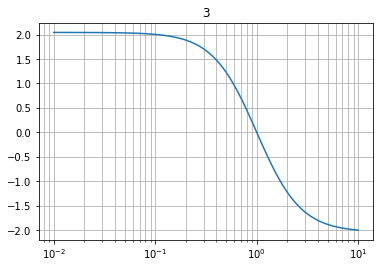

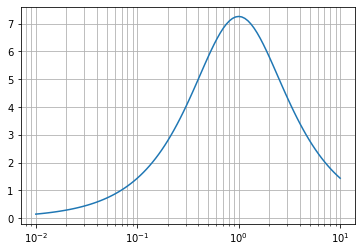

<Figure size 720x360 with 0 Axes>

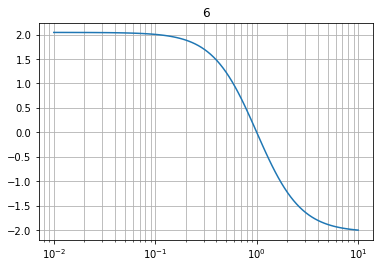

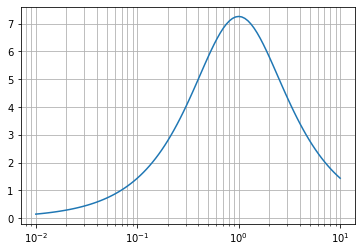

<Figure size 720x360 with 0 Axes>

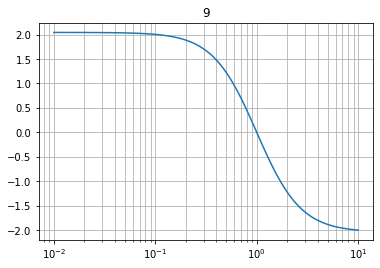

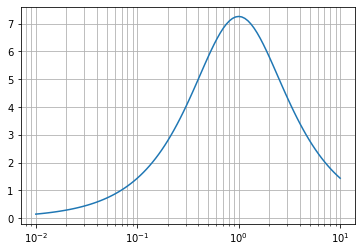

<Figure size 720x360 with 0 Axes>

In [23]:
import scipy.signal 

#matrices vacias
signalFilteredTele = np.zeros((Y_tele.shape[0],Y_tele.shape[1]))
signalFilteredLoc = np.zeros((Y_loc.shape[0],Y_loc.shape[1]))
signalFilteredReg = np.zeros((Y_reg.shape[0],Y_reg.shape[1]))

fs = fs_tele
lowcut = 1
highcut = 49.7
order = 9
for i in [3,6,9]: # diagramas de bode
  b, a = butter_bandpass(lowcut, highcut, fs, order)
  angularFreq, freqResponse, phaseResponse = butter_bandpass_bode(b,a)
  plt.figure(i)
  plt.semilogx(angularFreq, freqResponse)
  plt.grid(True, which = "both")
  plt.title(i)
  plt.figure(i+1)
  plt.semilogx(angularFreq, phaseResponse)
  plt.grid(True, which = "both")

  plt.figure(figsize=(10,5))
  
for j in range (0,Y_tele.shape[0]): # señales filtradas
  signalFilteredTele[j,:] = butter_bandpass_filter(Y_tele[j,:], lowcut, highcut, fs, order)
  signalFilteredReg[j,:] = butter_bandpass_filter(Y_reg[j,:], lowcut, highcut, fs, order)
  signalFilteredLoc[j,:] = butter_bandpass_filter(Y_loc[j,:], lowcut, highcut, fs, order)
  print(j)
  print(signalFilteredLoc[j,:10])

**Descomposicion de la señales de cada tipo**

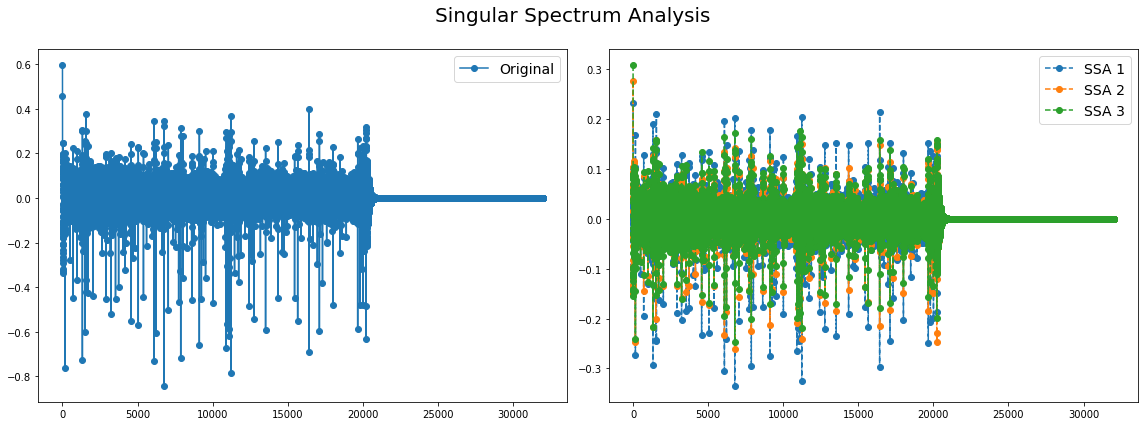

[ 0.01598726  0.03402068 -0.04423361  0.05130899 -0.04371798  0.04102269
 -0.02982656  0.00496487 -0.01258161  0.0026609 ]
[ 0.16090712  0.07430846 -0.01239077 -0.02149017 -0.02480367 -0.02337023
 -0.01512144  0.00435775 -0.00512157 -0.02027865]


In [30]:
x_tele = signalFilteredTele
groups = 3
ssaTele = SingularSpectrumAnalysis(window_size=groups)
X_ssaTele = ssa.fit_transform(x_tele)

#señal original 
plt.figure(figsize=(16, 6))
idSignal = 0
ax1 = plt.subplot(121)
ax1.plot(x_tele[idSignal], 'o-', label='Original')
ax1.legend(loc='best', fontsize=14)

ax2 = plt.subplot(122)
for i in range(groups):
    ax2.plot(X_ssaTele[idSignal, i], 'o--', label='SSA {0}'.format(i + 1))
ax2.legend(loc='best', fontsize=14)

plt.suptitle('Singular Spectrum Analysis', fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

#Regional 

x_reg = signalFilteredReg
ssaReg = SingularSpectrumAnalysis(window_size=groups)
X_ssaReg = ssa.fit_transform(x_reg)

print(X_ssaReg[10,2,:10])

#Local 

x_loc = signalFilteredLoc
ssaLoc = SingularSpectrumAnalysis(window_size=groups)
X_ssaLoc = ssa.fit_transform(x_loc)

print(X_ssaLoc[10,2,:10])

**Se realiza la STFT y se realizan las matrices de 63xD para cada tipo de señal**

<Figure size 432x288 with 0 Axes>

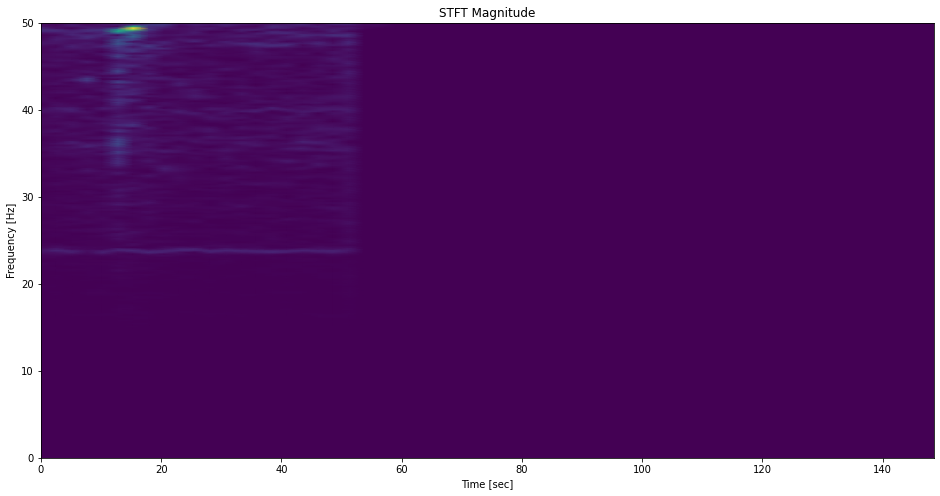

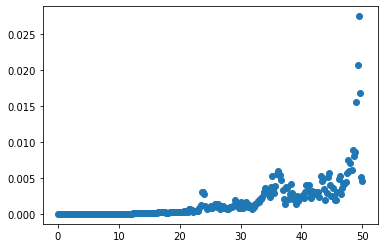

max(|Zxx| =  0.02742805112541732 dB
 Fmax at maxPower:  [49.4140625] Hz
var 9.001357417343008e-06
maxp 0.02742805112541732
meanP 0.0018001440080380917
minP 9.578440812689623e-07
Pmax at:  [0.01553959 0.01676135 0.02063805 0.02742805]  dB
fPmax:  [49.0234375 49.609375  49.21875   49.4140625]


In [63]:
from scipy import signal

f,t, Zxx = signal.stft(X_ssaLoc[0,2], fs, nperseg = 512)

absZxx =np.abs(Zxx)
plt.figure(1)
plt.figure(figsize=(16,8))
plt.pcolormesh(t,f,absZxx, shading="gouraud")
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

MaxSpectro = np.max(absZxx)
idFrecMax = np.where(absZxx == MaxSpectro)
frecPMax = f[idFrecMax[0]]

maximos = np.max(absZxx, axis=1)
plt.figure(2)
plt.scatter(f,maximos)
plt.show()


print('max(|Zxx| = ', MaxSpectro, 'dB\n Fmax at maxPower: ', frecPMax, 'Hz')

idx_Pot_ord = np.argsort(maximos)

idx_Pot_ord = idx_Pot_ord[-4:]

varP = np.var(maximos)
maxP = np.max(maximos)
meanP = np.mean(maximos)
minP = np.min(maximos)

print('var',varP)
print('maxp',maxP)
print('meanP',meanP)
print('minP',minP)



print('Pmax at: ',maximos[idx_Pot_ord],' dB\nfPmax: ',f[idx_Pot_ord])

In [59]:
DLoc = np.zeros((63,6))
con = 0
for i in range(X_ssaLoc.shape[0]):
  for j in range(groups):
    f,t, Zxx = signal.stft(X_ssaLoc[i,j], fs, nperseg = 512)

    absZxx =np.abs(Zxx)

    maximos = np.max(absZxx, axis=1)

    MaxSpectro = np.max(absZxx)
    idFrecMax = np.where(absZxx == MaxSpectro)
    frecPMax = f[idFrecMax[0]]   

    #varianza,media,minimo,maximos

    varP = np.var(maximos)
    maxP = np.max(maximos)
    meanP = np.mean(maximos)
    minP = np.min(maximos)

    dataArray=[MaxSpectro, frecPMax, varP, maxP, meanP, minP]

    DLoc[con] = dataArray

    print('Señal # ', con)
    print(DLoc[con])

    con+=1






Señal #  0
[2.80860226e-02 1.36718750e+00 2.13668855e-05 2.80860226e-02
 3.17639384e-03 3.84221306e-04]
Señal #  1
[1.10291494e-02 2.36328125e+01 1.75169664e-06 1.10291494e-02
 1.48238104e-03 2.64317914e-04]
Señal #  2
[2.74280511e-02 4.94140625e+01 9.00135742e-06 2.74280511e-02
 1.80014401e-03 9.57844081e-07]
Señal #  3
[3.23406427e-02 1.36718750e+00 2.81876235e-05 3.23406427e-02
 3.56718118e-03 6.18650792e-04]
Señal #  4
[1.16220564e-02 4.94140625e+01 2.78648992e-06 1.16220564e-02
 1.31740642e-03 6.39821917e-06]
Señal #  5
[4.96874631e-03 2.92968750e+01 6.13245068e-07 4.96874631e-03
 1.43823291e-03 4.52366913e-04]
Señal #  6
[4.66991804e-02 4.92187500e+01 3.20185308e-05 4.66991804e-02
 3.42974245e-03 1.14456299e-04]
Señal #  7
[1.65561949e-02 1.36718750e+00 8.79802519e-06 1.65561949e-02
 2.36891349e-03 1.10730474e-04]
Señal #  8
[7.33824459e-03 2.96875000e+01 3.09665647e-06 7.33824459e-03
 2.22780280e-03 1.91877658e-04]
Señal #  9
[4.66991804e-02 4.92187500e+01 3.20185308e-05 4.66991

In [60]:
DReg = np.zeros((63,6))
con2 = 0

for i in range(X_ssaReg.shape[0]):
  for j in range(groups):
    f,t, Zxx = signal.stft(X_ssaReg[i,j], fs, nperseg = 512)

    absZxx2 =np.abs(Zxx)

    maximos = np.max(absZxx2, axis=1)

    MaxSpectro = np.max(absZxx2)
    idFrecMax = np.where(absZxx2 == MaxSpectro)
    frecPMax = f[idFrecMax[0]]   

    #varianza,media,minimo,maximos

    varP = np.var(maximos)
    maxP = np.max(maximos)
    meanP = np.mean(maximos)
    minP = np.min(maximos)

    dataArray=[MaxSpectro, frecPMax, varP, maxP, meanP, minP]

    DReg[con2] = dataArray

    print('Señal # ', con2)
    print(DReg[con2])

    con2+=1

Señal #  0
[3.17002465e-02 1.36718750e+00 2.76247314e-05 3.17002465e-02
 3.49334511e-03 6.78683452e-04]
Señal #  1
[1.15569280e-02 1.75781250e+01 1.18890299e-06 1.15569280e-02
 1.52225337e-03 4.27009670e-04]
Señal #  2
[6.87197599e-03 4.94140625e+01 2.22427480e-06 6.87197599e-03
 1.36369997e-03 6.92996645e-05]
Señal #  3
[7.03995802e-02 5.85937500e+00 2.87297089e-04 7.03995802e-02
 1.30207146e-02 3.60418573e-04]
Señal #  4
[3.25580539e-02 1.60156250e+01 4.74292001e-05 3.25580539e-02
 9.24471821e-03 2.22632291e-04]
Señal #  5
[2.74252209e-02 4.27734375e+01 4.91474773e-05 2.74252209e-02
 6.84378760e-03 3.63585345e-05]
Señal #  6
[1.84824124e-02 2.14843750e+00 1.67841946e-05 1.84824124e-02
 3.36334145e-03 3.47065934e-04]
Señal #  7
[6.83557218e-03 1.62109375e+01 2.74877685e-06 6.83557218e-03
 2.46834192e-03 2.16225252e-04]
Señal #  8
[8.14225274e-03 4.88281250e+01 4.44679166e-06 8.14225274e-03
 2.05735611e-03 3.63109951e-05]
Señal #  9
[3.14483202e-02 1.36718750e+00 2.72666323e-05 3.14483

In [61]:
DTele = np.zeros((63,6))
con3 = 0

for i in range(X_ssaTele.shape[0]):
  for j in range(groups):
    f,t, Zxx = signal.stft(X_ssaTele[i,j], fs, nperseg = 512)

    absZxx3 =np.abs(Zxx)

    maximos = np.max(absZxx3, axis=1)

    MaxSpectro = np.max(absZxx3)
    idFrecMax = np.where(absZxx3 == MaxSpectro)
    frecPMax = f[idFrecMax[0]]   

    #varianza,media,minimo,maximos

    varP = np.var(maximos)
    maxP = np.max(maximos)
    meanP = np.mean(maximos)
    minP = np.min(maximos)

    dataArray=[MaxSpectro, frecPMax, varP, maxP, meanP, minP]

    DTele[con3] = dataArray

    print('Señal # ', con)
    print(DTele[con3])

    con3+=1

Señal #  63
[1.33852729e-02 2.26562500e+01 4.74375326e-06 1.33852729e-02
 2.89521956e-03 4.16384523e-04]
Señal #  63
[1.47621149e-02 1.36718750e+00 4.95768827e-06 1.47621149e-02
 3.00800154e-03 6.74900117e-04]
Señal #  63
[1.43743369e-02 1.36718750e+00 7.09303693e-06 1.43743369e-02
 3.16720404e-03 1.03715192e-04]
Señal #  63
[1.33852729e-02 2.26562500e+01 4.74375326e-06 1.33852729e-02
 2.89521956e-03 4.16384523e-04]
Señal #  63
[1.47621149e-02 1.36718750e+00 4.95768827e-06 1.47621149e-02
 3.00800154e-03 6.74900117e-04]
Señal #  63
[1.43743369e-02 1.36718750e+00 7.09303693e-06 1.43743369e-02
 3.16720404e-03 1.03715192e-04]
Señal #  63
[1.33852729e-02 2.26562500e+01 4.74375326e-06 1.33852729e-02
 2.89521956e-03 4.16384523e-04]
Señal #  63
[1.47621149e-02 1.36718750e+00 4.95768827e-06 1.47621149e-02
 3.00800154e-03 6.74900117e-04]
Señal #  63
[1.43743369e-02 1.36718750e+00 7.09303693e-06 1.43743369e-02
 3.16720404e-03 1.03715192e-04]
Señal #  63
[1.33852729e-02 2.26562500e+01 4.74375326e-

**Concatenamos las señales de tele, reg, local con sus caracteristicas en una misma para empezar a realizar los dataframes**

In [ ]:
#hola mundo